In [12]:
#CNN is .better than multilayer perceptions and has less parameters than dense layers.Convolution, pooling are main parts.
#CONVOLUTION:#Kernel is also called filter.Kernel is matrix of weight elements.Greyscale Image is converted into pixels matrix.
#Output is of same dimension as input original image.We consider dot product of image and kernel.
#Apply zero padding to the edge multiplications.


In [13]:
#Kernel is a feature detector filter.Eg oblique line or vertical line detector.Model self learns the kernel.
#By learning the weights of kernel we train CNN.Grid size is same as order of matrix.We specify grids with odd numbers.
#In odd kernels we have center pixel as a reference value.Step size to slide kernel on image is called stride..
#Same stride for horizonal as well as vertical is mostly used.
#For color image RGB are 3 different kernel matrices.Eg 3x3x3 means order 3x3 with third parameter as depth.
#Depth is same as channels as RGB are three channels of light or color.So for image we have 3d array

In [14]:
#POOLING:It downsamples the images and shrinks the image.In DL max pooling is frequently used.just a mathematical operation.
#We pass input data to convolution layers + relu and then  pool layers and repeat this again for feauture learning .
#then we flatten the i/p and see fully connnected networks to get output using softmax activation fxn.
#mmoving from one layr to another we get high level features.

In [15]:
#CNN in AUDIO:CNN can be applied.Take spectrograms or MFCCS as images.Amplitude can act as pixel value.
#Time and frequency are the x and y axis of image.Audio data has correlated structures like image and we can implement CNN.
#Data shape=51200/512x13x1 where 51200 is no of samples in udio & 512 is Hoplength.13 are the mfccs of audio.
# 1 is the depth and audio data is like monochannel or just greyscale.

In [16]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "MFCC_Data.json"


In [17]:
def load_data(data_path):
    #Loads training dataset from json file.
        

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y



In [18]:
def plot_history(history):
    #Plots accuracy/loss for training/validation set as a function of the epochs
    

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [19]:
def prepare_datasets(test_size, validation_size):
    #Loads data and splits it into train, validation and test sets.
    

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    #we split our data into train test and train validation..
    #For CNN tensor flow accepts a 3D array...X train is 2D here.We tear channel as 1 like a greyscle image (monochannel)
    #(X,Y,1)
    X_train = X_train[..., np.newaxis]#4D array with ist value as [samples , X,Y,1]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [20]:
def build_model(input_shape):#Model of CNN with 3 convolutional layers and later max pooling...
    #param input_shape..

    #making network Architechture,..
    model = keras.Sequential()

    # 1st conv layer,Adding a layer to the model usind .add()
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    #We use pooling to down sample our input..Matrix is 3x3 and stride of 2 with zero padding at edges.
    model.add(keras.layers.BatchNormalization())
    #We have 32 filters and 3x3 grid size kernel with relu activation fxn.
    #in input_shape we want to use X_train's X,Y,depth terms.Input shape is a tuple here of 3 values for convolution.

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    #Batch normalisation normalises/standardises the activation fxn of current layer.
    #model converges a way faster with more reliability and training is speeded up alot.

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    #using keras and tensor flow we flatten 2D array of layers to 1D array.
    #Adding fully connected dense layer for classification.There are 64 neurons.
    model.add(keras.layers.Dense(64, activation='relu'))#Fed flattened o/p to dense layer..
    model.add(keras.layers.Dropout(0.3))
    #30% dropout to solve overfitting problem...

    # output layer This uses softmax fxn to get probability distribution.
    model.add(keras.layers.Dense(10, activation='softmax')) 
    #Here we have 10 neurons because we have 1-0 genres in dataset to classify ..
    return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 6, 32)        0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 64, 6, 32)        128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                      

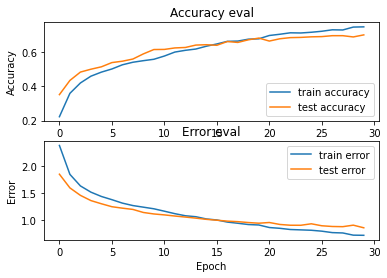

79/79 - 1s - loss: 0.8065 - accuracy: 0.7277 - 589ms/epoch - 7ms/step

Test accuracy: 0.7276732325553894
Target: 9, Predicted label: [2]


In [21]:
def predict(lmode, X, y):#Passed model in the prediction..
    #Predict a single sample using the trained model
    

    # add a dimension to input data for sample - model.predict() expects a 4d array
    X = X[np.newaxis, ...]# (1, 130, 13, 1)We are adding extra dimension to make a 4D array.

    # perform prediction
    prediction = model.predict(X)

    predicted_index = np.argmax(prediction, axis=1)
    #Out of prediction array we want to extract the max probable value.Gives 1D value b/w 0 to 9.

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)
    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()
     # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    # predict sample
    predict(model, X_to_predict, y_to_predict)